In this notebok I am using two different datasets of kaggle to demonstrate random forest in supervised learning as classifier and regressor.Being a classifier i am deciding a transaction is fraudulent (1) or not (0).Being a regressor,I am predicting house prices based on various features.I have used RandomForestClassifier for fraud detection & RandomForestRegressor for house prices.I also used Feature importance visualizations and Confusion matrix and error plots

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
# Install Kaggle CLI
!pip install kaggle

In [3]:
# Move the JSON File and Set Permissions**
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Install the Kaggle CLI
!pip install -q kaggle

In [5]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0


In [6]:

# Unzip the dataset
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [8]:
# Download housing prices
!kaggle datasets download -d harishkumardatalab/housing-price-prediction

Dataset URL: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction
License(s): CC0-1.0


In [13]:
# Unzip the dataset
!ls
!unzip housing-price-prediction.zip
!ls


creditcard.csv	     Housing.csv		   kaggle.json
creditcardfraud.zip  housing-price-prediction.zip  sample_data
Archive:  housing-price-prediction.zip
replace Housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Housing.csv             
creditcard.csv	     Housing.csv		   kaggle.json
creditcardfraud.zip  housing-price-prediction.zip  sample_data


Random Forest --Classification

In [23]:
# importing libararies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
# Load dataset
df_fraud = pd.read_csv('creditcard.csv')
df_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
# Features and labels
X_fraud = df_fraud.drop(['Class', 'Time'], axis=1)
y_fraud = df_fraud['Class']

In [19]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_fraud, y_fraud, test_size=0.3, stratify=y_fraud, random_state=42)

In [20]:
# Train model
rf_fraud = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fraud.fit(X_train, y_train)
y_pred = rf_fraud.predict(X_test)

In [21]:
# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



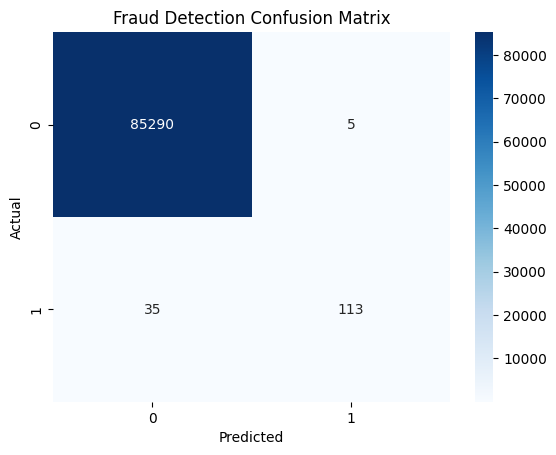

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Fraud Detection Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

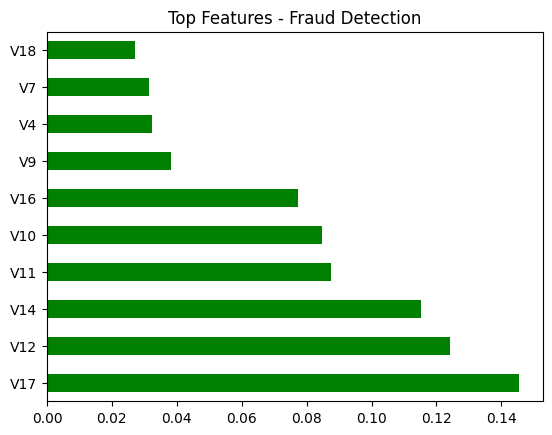

In [34]:
#Feature Importance - Fraud Detection
importances = pd.Series(rf_fraud.feature_importances_, index=X_fraud.columns)
importances.nlargest(10).plot(kind='barh', color='green')
plt.title("Top Features - Fraud Detection")
plt.show()

In [27]:
fraud_count = np.sum(y_pred == 1)
notfraud_count = np.sum(y_pred == 0)

# Print counts
print(f"✅ Fraud count: {fraud_count}")
print(f"❌ Not fraud count: {notfraud_count}")

✅ Fraud count: 118
❌ Not fraud count: 85325


In [28]:
# Total number of predictions
total = len(y_pred)

# Count predictions
fraud_count = np.sum(y_pred == 1)
notfraud_count = np.sum(y_pred == 0)

# Percentages
fraud_percent = (fraud_count / total) * 100
notfraud_percent = (notfraud_count / total) * 100

# Print results
print(f"✅ Fraud count: {fraud_count} ({fraud_percent:.2f}%)")
print(f"❌ Not fraud count: {notfraud_count} ({notfraud_percent:.2f}%)")

✅ Fraud count: 118 (0.14%)
❌ Not fraud count: 85325 (99.86%)


House Price Prediction using under regression --random forest classifier

In [31]:
!ls


creditcard.csv	     Housing.csv		   kaggle.json
creditcardfraud.zip  housing-price-prediction.zip  sample_data


In [32]:
df_house = pd.read_csv('Housing.csv')
df_house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [35]:
# Import sklearn MS2 and r2
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
# Drop rows with missing target
df_house = df_house.dropna(subset=['price'])

In [38]:
# Select numeric features
df_num = df_house.select_dtypes(include=['int64', 'float64']).dropna(axis=1)
X_house = df_num.drop('price', axis=1)
y_house = df_num['price']


In [39]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_house, y_house, test_size=0.3, random_state=42)

In [40]:
# Train regressor
rf_house = RandomForestRegressor(n_estimators=100, random_state=42)
rf_house.fit(X_train, y_train)
y_pred = rf_house.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Print the RMSE
print(f"RMSE: {rmse:.2f}")

RMSE: 1583004.48


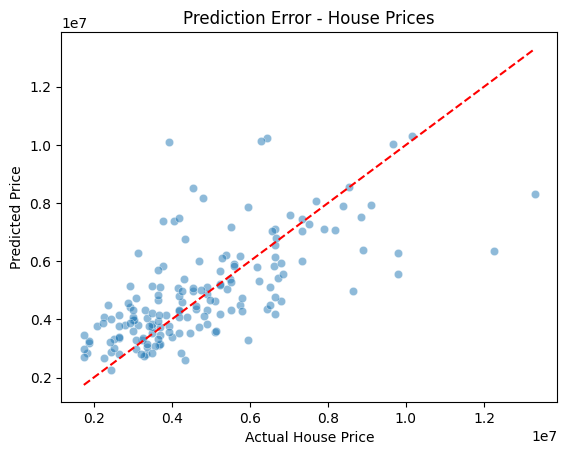

In [49]:
# Prediction Error Plot - House Price
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted Price")
plt.title("Prediction Error - House Prices")
plt.show()

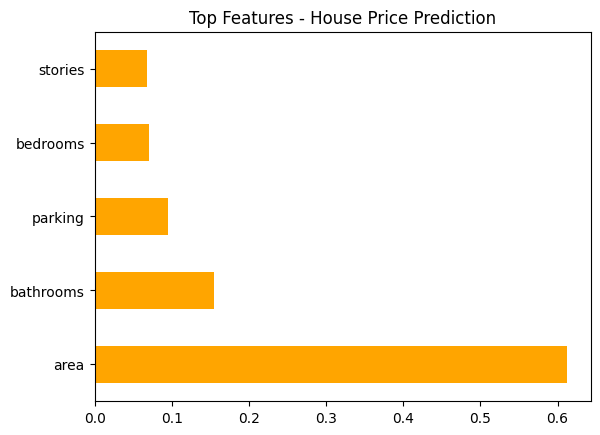

In [50]:
# Feature Importance - House Price
importances = pd.Series(rf_house.feature_importances_, index=X_house.columns)
importances.nlargest(10).plot(kind='barh', color='orange')
plt.title("Top Features - House Price Prediction")
plt.show()

**Summary**
For fraud detection, Random Forest is a good choice, especially when tuned for imbalanced data.Challenges-Handling the imbalance in fraud data can be tricky. Random Forest might predict "not fraud" more often than "fraud."It could be computationally intensive, especially for large datasets,
For house price prediction, Random Forest works well, but tuning parameters and evaluating performance metrics like RMSE will ensure better accuracy and avoid overfitting.Challenges:Overfitting can occur if the model is too complex, with too many trees or deep trees.Interpretability: While Random Forest provides feature importance, it does not offer simple interpretations as linear models do.